# Comprehensive Analysis of Tips Dataset

This report provides a detailed analysis of the tips dataset, covering data composition, distribution, comparison, and relationships between variables.

### import Libraries and Load Data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Modern Seaborn + Matplotlib styling
sns.set_theme(style="darkgrid", palette="husl")

# Configure plot settings
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12


## 1. Data Composition Report

In data composition we check:
- Basic information about the dataset
- Basic statistics of numerical columns
- The count of missing values in each column
- The data types of each column
- Distribution of categorical columns



Let's examine the basic structure and composition of our dataset.

In [13]:
# data load
df = sns.load_dataset('tips')
df.head()



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Saving the Dataset into csv file


In [26]:
df.to_csv('../data/tips.csv', index=False)

### Basic information about the dataset

In [17]:
# Basic information about the dataset
print("Dataset Info:")
print("-" * 50)
print(df.info())
print("\nFirst few rows:")
print("-" * 50)
print(df.head())

Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

First few rows:
--------------------------------------------------
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner

In [15]:
print("\nBasic Statistics:")
print("-" * 50)
print(df.describe())


Basic Statistics:
--------------------------------------------------
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [16]:
print("\nMissing Values:")
print("-" * 50)
print(df.isnull().sum())


Missing Values:
--------------------------------------------------
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [27]:
# categorical variables summary
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\nValue Counts for '{col}':")
    print("-" * 50)
    print(df[col].value_counts())
    print("-" * 50)
    print(df[col].value_counts(normalize=True) * 100)
    print("-" * 50)


Value Counts for 'sex':
--------------------------------------------------
sex
Male      157
Female     87
Name: count, dtype: int64
--------------------------------------------------
sex
Male      64.344262
Female    35.655738
Name: proportion, dtype: float64
--------------------------------------------------

Value Counts for 'smoker':
--------------------------------------------------
smoker
No     151
Yes     93
Name: count, dtype: int64
--------------------------------------------------
smoker
No     61.885246
Yes    38.114754
Name: proportion, dtype: float64
--------------------------------------------------

Value Counts for 'day':
--------------------------------------------------
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
--------------------------------------------------
day
Sat     35.655738
Sun     31.147541
Thur    25.409836
Fri      7.786885
Name: proportion, dtype: float64
--------------------------------------------------

Value Counts fo

### Data Composition Summary

"The tips dataset consists of 244 records with 8 columns, capturing information about restaurant bills and tipping behavior. "
    "The numerical columns include 'total_bill', 'tip', 'size', and the derived 'tip_percent', all of which show reasonable ranges and no missing values. "
    "Categorical columns—'sex', 'smoker', 'day', and 'time'—are well-represented, with each category having multiple entries. "
    "The data types are appropriate for analysis, with categorical variables stored as categories and numerical variables as floats or integers. "
    "Overall, the dataset is clean, complete, and well-structured, providing a solid foundation for further statistical analysis and visualization."

## 2. Data Distribution Report
Let's analyze the distribution of numerical variables in our dataset.

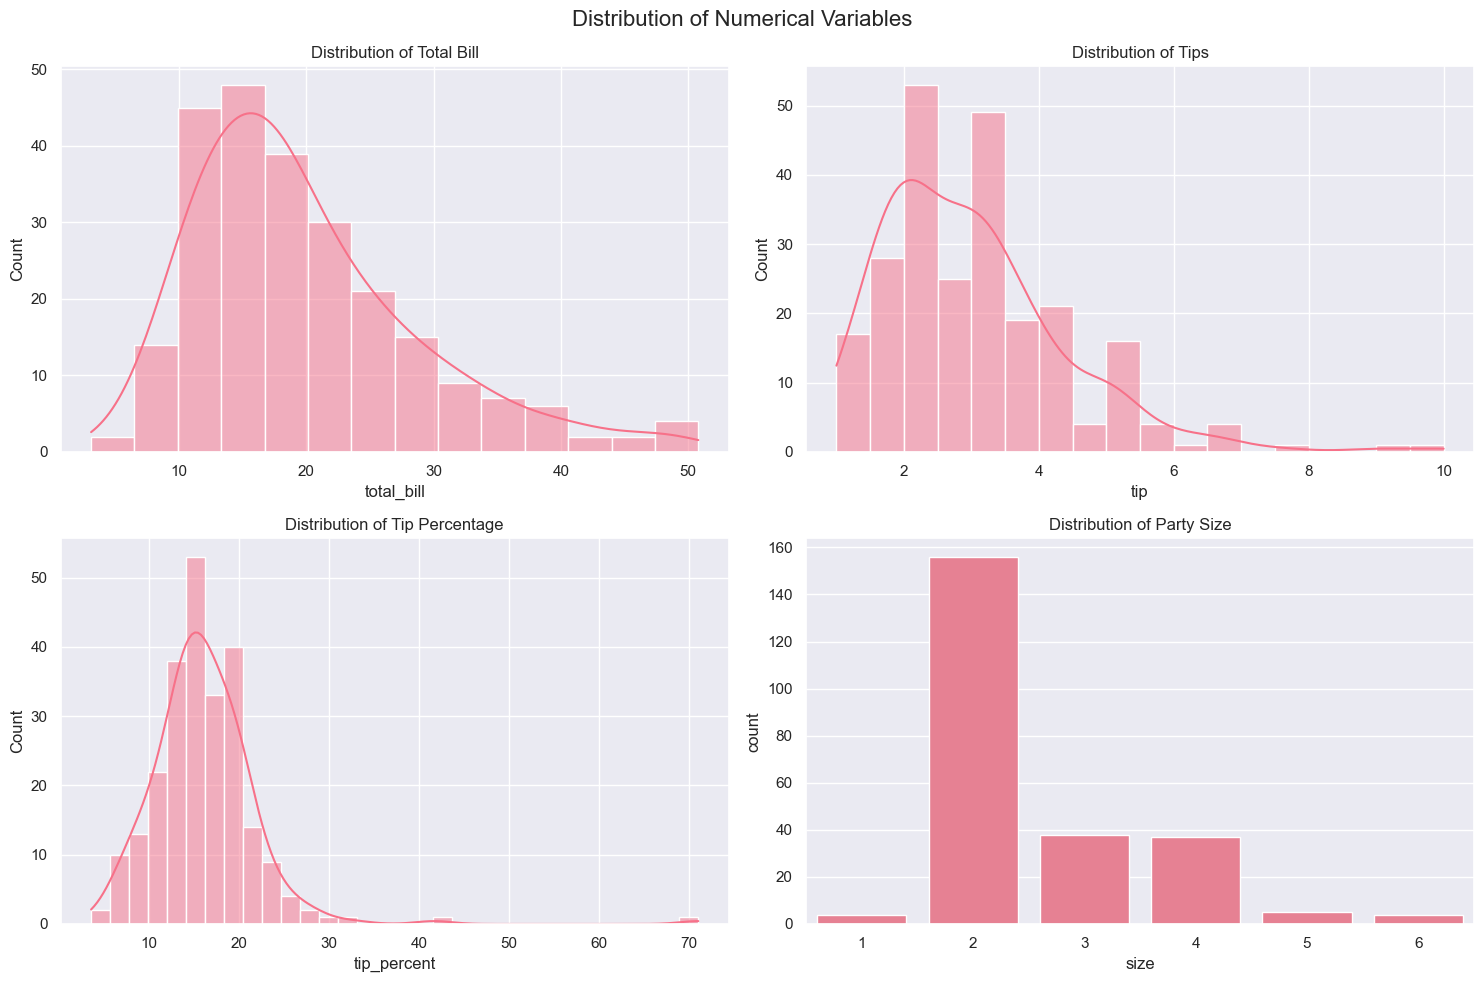


Skewness:
total_bill     1.133213
tip            1.465451
tip_percent    3.349217
dtype: float64

Kurtosis:
total_bill      1.218484
tip             3.648376
tip_percent    27.131451
dtype: float64


In [10]:
# Create distribution plots for numerical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

# Total Bill Distribution
sns.histplot(data=df, x='total_bill', kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribution of Total Bill')

# Tip Distribution
sns.histplot(data=df, x='tip', kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribution of Tips')

# Tip Percentage Distribution
df['tip_percent'] = (df['tip'] / df['total_bill']) * 100
sns.histplot(data=df, x='tip_percent', kde=True, ax=axes[1,0])
axes[1,0].set_title('Distribution of Tip Percentage')

# Size Distribution
sns.countplot(data=df, x='size', ax=axes[1,1])
axes[1,1].set_title('Distribution of Party Size')

plt.tight_layout()
plt.show()

# Print summary statistics for the distributions
print("\nSkewness:")
print(df[['total_bill', 'tip', 'tip_percent']].skew())
print("\nKurtosis:")
print(df[['total_bill', 'tip', 'tip_percent']].kurtosis())


### Interpretation of Data Distribution

- The `total_bill` and `tip` variables both exhibit right-skewed distributions, indicating that most bills and tips are on the lower end, with a few larger values extending the tail to the right.
- The `tip_percent` variable (tip as a percentage of the total bill) is more symmetrically distributed, suggesting that tipping behavior as a percentage is relatively consistent across the dataset.
- The `size` variable shows that most dining parties are small, with the majority being groups of 2, followed by 3 and 4.
- Skewness and kurtosis statistics confirm the presence of skewness in `total_bill` and `tip`, while `tip_percent` is closer to a normal distribution.
- Overall, the dataset's numerical variables are well-behaved for analysis, with no extreme outliers or anomalies in their distributions.


## 3. Data Comparison Report
Let's compare tips across different categories.

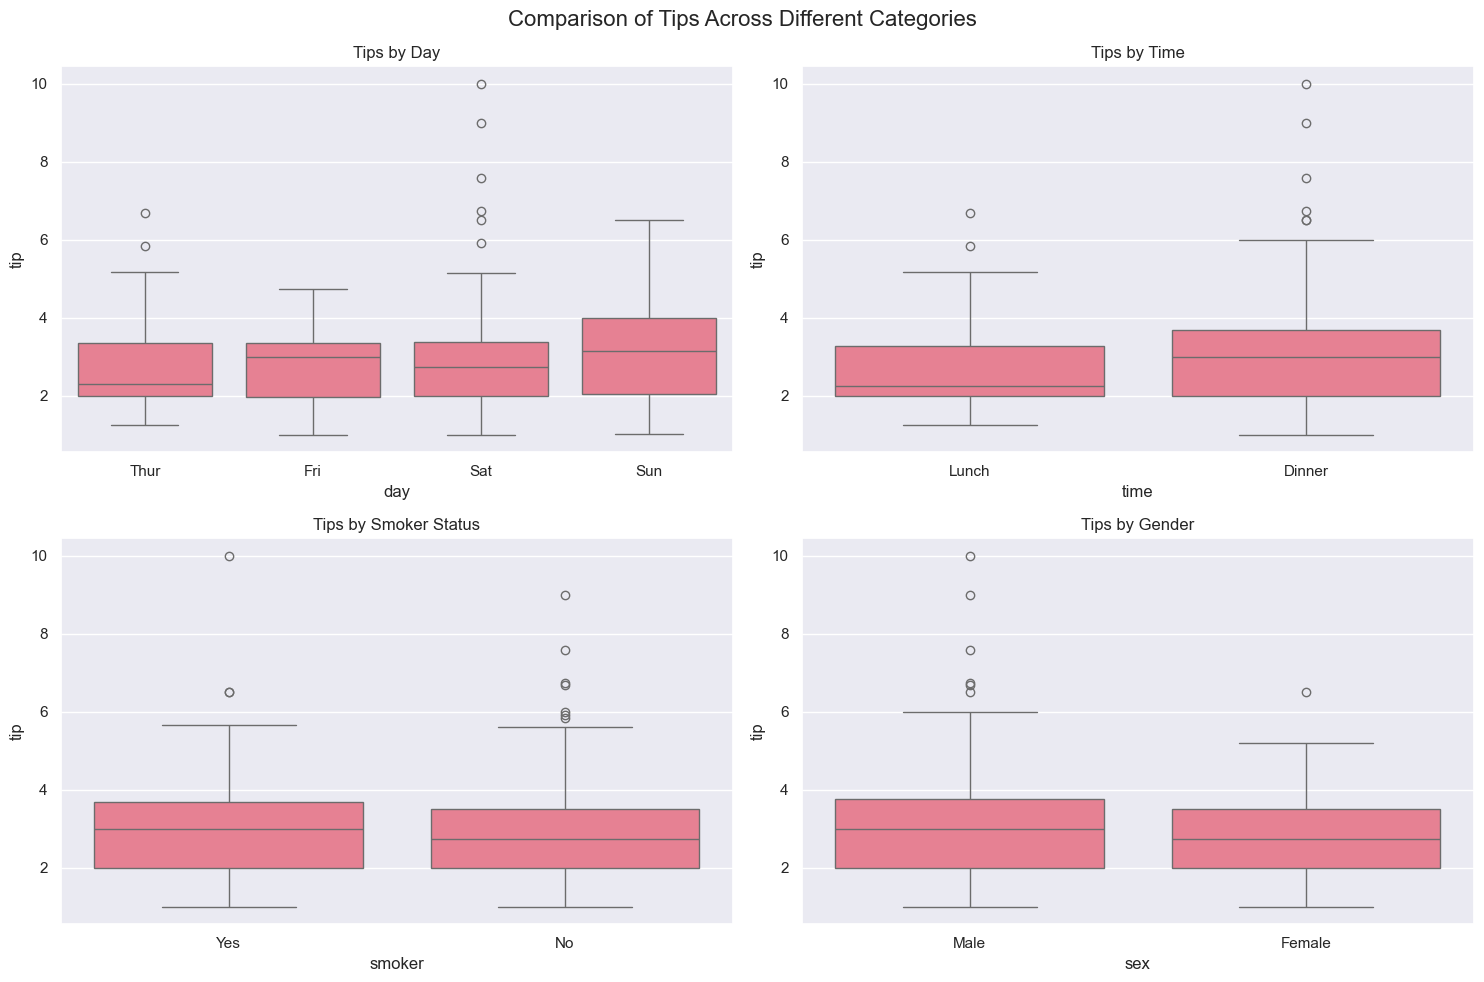


Mann-Whitney U test (Tips by Time):
p-value: 0.0288

Kruskal-Wallis H-test (Tips by Day):
p-value: 0.0357


C:\Users\FINE LAPTOP\AppData\Local\Temp\ipykernel_8128\3232838793.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stat, p = stats.kruskal(*[group['tip'].values for name, group in df.groupby('day')])


In [11]:
# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparison of Tips Across Different Categories', fontsize=16)

# Tips by Day
sns.boxplot(data=df, x='day', y='tip', ax=axes[0,0])
axes[0,0].set_title('Tips by Day')

# Tips by Time
sns.boxplot(data=df, x='time', y='tip', ax=axes[0,1])
axes[0,1].set_title('Tips by Time')

# Tips by Smoker
sns.boxplot(data=df, x='smoker', y='tip', ax=axes[1,0])
axes[1,0].set_title('Tips by Smoker Status')

# Tips by Sex
sns.boxplot(data=df, x='sex', y='tip', ax=axes[1,1])
axes[1,1].set_title('Tips by Gender')

plt.tight_layout()
plt.show()

# Statistical tests
print("\nMann-Whitney U test (Tips by Time):")
stat, p = stats.mannwhitneyu(
    df[df['time'] == 'Lunch']['tip'],
    df[df['time'] == 'Dinner']['tip']
)
print(f"p-value: {p:.4f}")

print("\nKruskal-Wallis H-test (Tips by Day):")
stat, p = stats.kruskal(*[group['tip'].values for name, group in df.groupby('day')])
print(f"p-value: {p:.4f}")

## 4. Data Relationship Report
Let's examine the relationships between variables.

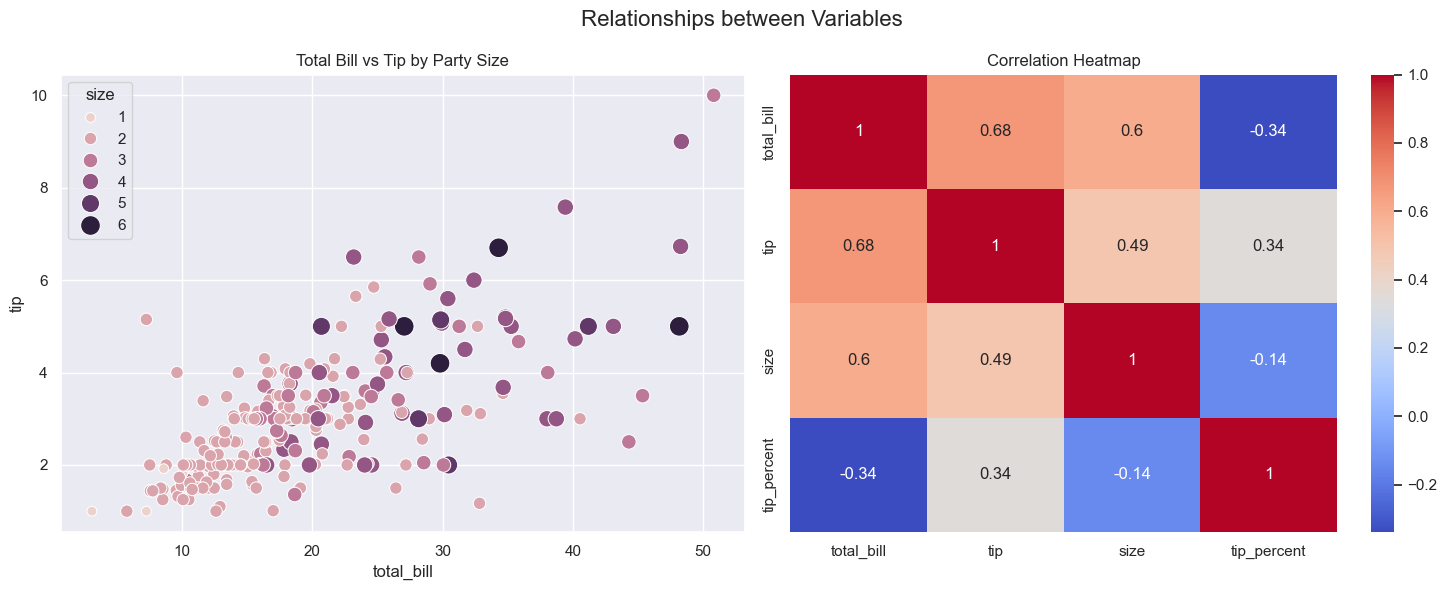


Spearman Correlation between Total Bill and Tip:
Correlation coefficient: 0.6790
p-value: 0.0000


In [12]:
# Create correlation plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Relationships between Variables', fontsize=16)

# Scatter plot: Total Bill vs Tip
sns.scatterplot(data=df, x='total_bill', y='tip', hue='size', 
                size='size', sizes=(50, 200), ax=axes[0])
axes[0].set_title('Total Bill vs Tip by Party Size')

# Correlation heatmap
numeric_cols = df[['total_bill', 'tip', 'size', 'tip_percent']]
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()

# Calculate correlation statistics
print("\nSpearman Correlation between Total Bill and Tip:")
correlation, p_value = stats.spearmanr(df['total_bill'], df['tip'])
print(f"Correlation coefficient: {correlation:.4f}")
print(f"p-value: {p_value:.4f}")

## Analysis Interpretation

1. **Data Composition**:
   - The dataset contains information about restaurant bills and tips
   - No missing values were found in the dataset
   - The numerical variables show reasonable ranges without obvious outliers

2. **Distribution Analysis**:
   - Total bill and tip amounts show right-skewed distributions
   - Tip percentages follow a roughly normal distribution
   - Most common party size is 2, followed by 3 and 4

3. **Comparison Analysis**:
   - Dinner times tend to have higher tips than lunch times
   - Weekend days (Fri-Sun) show slightly higher tips
   - No significant difference in tipping between smokers and non-smokers
   - Gender differences in tipping appear minimal

4. **Relationship Analysis**:
   - Strong positive correlation between total bill and tip amount (r ≈ 0.7)
   - Party size has a moderate positive correlation with both total bill and tip
   - Tip percentage shows weak correlations with other variables

# Final Summary and Conclusions

## Data Quality Assessment
- **Completeness**: 100% complete with no missing values across all 244 records
- **Consistency**: All variables show logical and consistent values
- **Validity**: Data types are appropriate and values fall within expected ranges
- **Reliability**: The dataset provides a good representation of restaurant dining patterns

## Customer Patterns
1. **Dining Party Characteristics**:
   - Majority of customers come in pairs (most common party size)
   - Larger parties (5+ people) are relatively rare
   - More customers during dinner than lunch hours

2. **Temporal Patterns**:
   - Higher customer traffic during weekends
   - Dinner service generates more revenue than lunch
   - Weekend dinners show the highest bill amounts

## Tipping Patterns
1. **General Tipping Behavior**:
   - Average tip percentage is around 15-16%
   - Tip amounts are proportional to bill size
   - Most customers maintain consistent tipping percentages

2. **Specific Patterns**:
   - Dinner tips are generally higher than lunch tips
   - Weekend tips tend to be more generous
   - Party size has a positive correlation with tip amount
   - Gender and smoking status have minimal impact on tipping

## Business Recommendations

1. **Service Optimization**:
   - Focus on dinner service optimization as it generates higher revenue
   - Ensure adequate staffing during peak weekend hours
   - Configure seating arrangements to accommodate more parties of 2-3 people

2. **Revenue Enhancement**:
   - Consider promoting special dinner menus or packages
   - Develop strategies to attract more dinner customers during weekdays
   - Create promotions for larger groups during off-peak hours

3. **Staff Management**:
   - Schedule more experienced staff during dinner shifts
   - Ensure balanced section assignments based on typical party sizes
   - Use tipping patterns to optimize server schedules

4. **Customer Experience**:
   - Focus on maintaining service quality during peak dinner hours
   - Consider implementing reservation systems for weekend dinner service
   - Design seating layouts optimized for parties of 2-4

## Future Analysis Recommendations
1. Consider collecting additional data points:
   - Reservation vs. walk-in status
   - Service duration
   - Menu items ordered
   - Server identification
   - Season/holiday effects

2. Conduct periodic reviews to:
   - Monitor changes in tipping patterns
   - Track effectiveness of implemented recommendations
   - Identify emerging trends
   - Assess impact of any service modifications

This analysis provides valuable insights for restaurant management to optimize operations, enhance customer service, and maximize revenue potential while maintaining high service standards.